[INFO] Running on device: cuda
[INFO] Downloading dataset via KaggleHub...


100%|██████████| 10.3G/10.3G [02:00<00:00, 92.1MB/s]

Extracting files...


[INFO] Dataset located at: /root/.cache/kagglehub/datasets/amerii/spacenet-7-multitemporal-urban-development/versions/1
[INFO] TRAIN: Loading sequences from 64 cities...
[INFO] VAL: Loading sequences from 17 cities...

[INFO] Starting Training for 20 epochs...


Ep 1/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 1: Loss=0.01389 | PSNR=19.79dB | SSIM=0.6803 | Change F1=0.2624


Ep 2/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 2: Loss=0.01264 | PSNR=20.05dB | SSIM=0.6988 | Change F1=0.1986


Ep 3/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 3: Loss=0.01268 | PSNR=20.09dB | SSIM=0.7098 | Change F1=0.2406


Ep 4/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 4: Loss=0.01306 | PSNR=19.86dB | SSIM=0.7035 | Change F1=0.2545


Ep 5/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 5: Loss=0.01173 | PSNR=20.30dB | SSIM=0.7105 | Change F1=0.1944


Ep 6/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 6: Loss=0.01498 | PSNR=19.62dB | SSIM=0.7039 | Change F1=0.2235


Ep 7/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 7: Loss=0.01207 | PSNR=20.25dB | SSIM=0.7116 | Change F1=0.1749


Ep 8/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 8: Loss=0.01230 | PSNR=20.31dB | SSIM=0.7148 | Change F1=0.2245


Ep 9/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 9: Loss=0.01171 | PSNR=20.39dB | SSIM=0.7215 | Change F1=0.1510


Ep 10/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 10: Loss=0.01173 | PSNR=20.27dB | SSIM=0.7147 | Change F1=0.1824


Ep 11/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 11: Loss=0.01176 | PSNR=20.41dB | SSIM=0.7185 | Change F1=0.1945


Ep 12/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 12: Loss=0.01224 | PSNR=20.21dB | SSIM=0.7151 | Change F1=0.3271


Ep 13/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 13: Loss=0.01203 | PSNR=20.42dB | SSIM=0.7214 | Change F1=0.2157


Ep 14/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 14: Loss=0.01318 | PSNR=20.12dB | SSIM=0.7144 | Change F1=0.2334


Ep 15/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 15: Loss=0.01290 | PSNR=20.15dB | SSIM=0.7125 | Change F1=0.2101


Ep 16/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 16: Loss=0.01179 | PSNR=20.40dB | SSIM=0.7199 | Change F1=0.2031


Ep 17/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 17: Loss=0.01149 | PSNR=20.41dB | SSIM=0.7192 | Change F1=0.2134


Ep 18/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 18: Loss=0.01281 | PSNR=19.95dB | SSIM=0.6923 | Change F1=0.2935


Ep 19/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 19: Loss=0.01166 | PSNR=20.53dB | SSIM=0.7209 | Change F1=0.2229


Ep 20/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 20: Loss=0.01154 | PSNR=20.42dB | SSIM=0.7198 | Change F1=0.2066
[INFO] Metrics plots saved to results_metrics/training_metrics_plot.png

[INFO] Starting 5-Year Future Simulation...


Simulating 5 Years:   0%|          | 0/60 [00:00<?, ?it/s]

[INFO] 5-Year Simulation saved to results_metrics/future_5_year_simulation.png


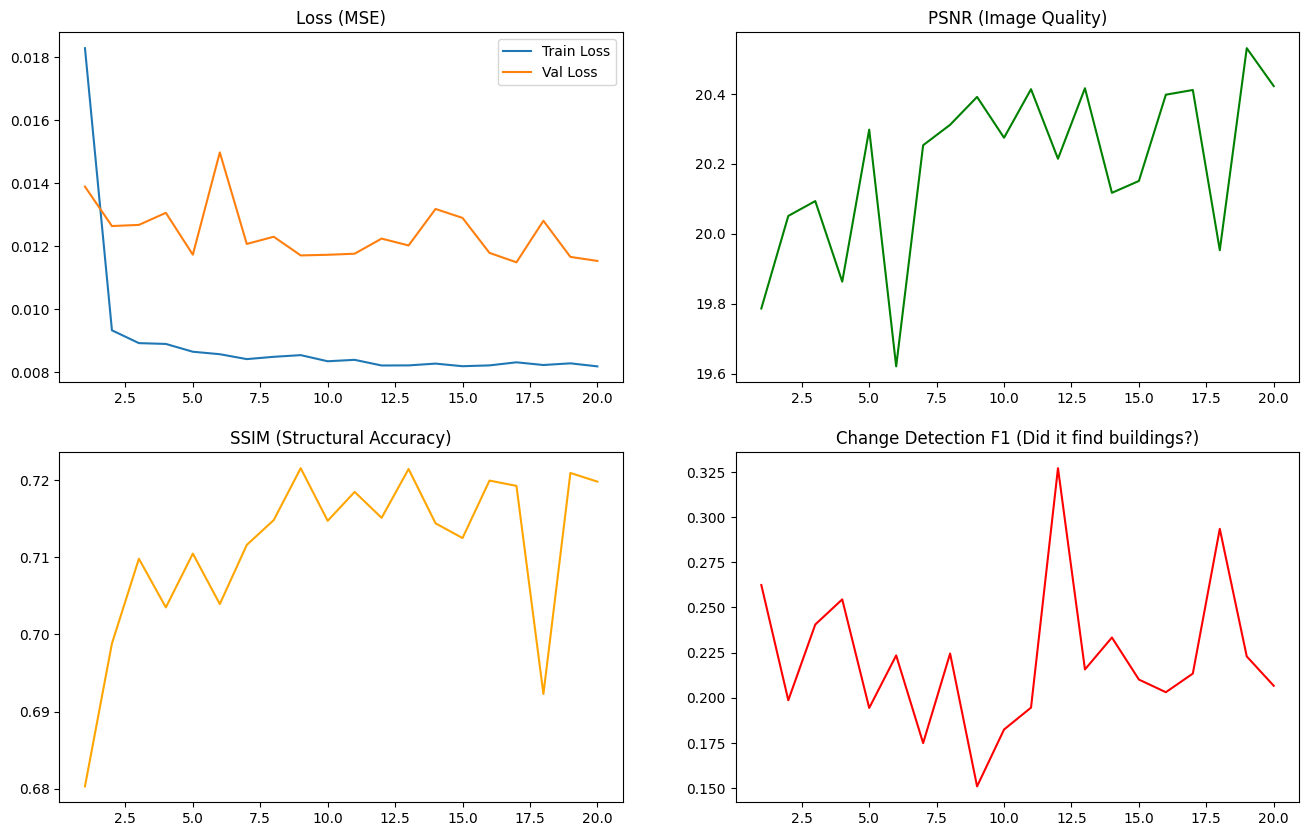

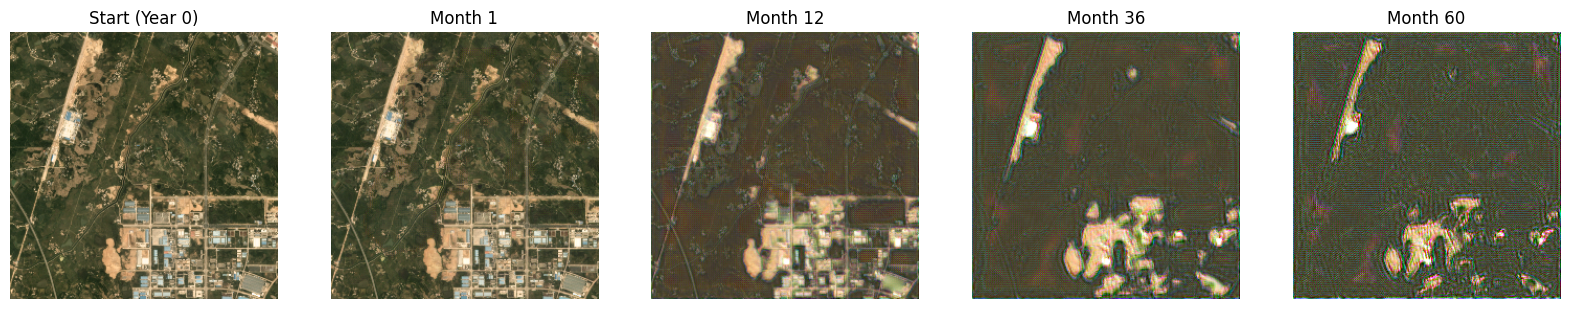

In [ ]:
# =========================================================================
#  SPACENET-7: RESIDUAL LEARNING
# =========================================================================

# 1. INSTALL DEPENDENCIES
!pip install -q rasterio kagglehub scikit-image

# 2. IMPORTS
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from skimage.metrics import structural_similarity as ssim
import kagglehub

# 3. CONFIGURATION
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
EPOCHS = 20
SEQ_LENGTH = 3      # t-3, t-2, t-1
IMG_SIZE = 256
OUT_DIR = "results_metrics"
os.makedirs(OUT_DIR, exist_ok=True)

print(f"[INFO] Running on device: {DEVICE}")

# 4. DOWNLOAD DATASET
print("[INFO] Downloading dataset via KaggleHub...")
try:
    raw_path = kagglehub.dataset_download("amerii/spacenet-7-multitemporal-urban-development")
    print(f"[INFO] Dataset located at: {raw_path}")
except Exception as e:
    print(f"[ERROR] Download failed: {e}")
    raw_path = "dataset"

# ==========================================
#  METRICS UTILITIES
# ==========================================

def calculate_psnr(pred, gt):
    """Peak Signal-to-Noise Ratio"""
    mse = torch.mean((pred - gt) ** 2)
    if mse == 0: return 100.0
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

def calculate_ssim_batch(pred_tensor, gt_tensor):
    """Structural Similarity Index (Average of batch)"""
    # Convert to Numpy: (B, C, H, W) -> (B, H, W, C)
    pred_np = pred_tensor.detach().cpu().numpy().transpose(0, 2, 3, 1)
    gt_np = gt_tensor.detach().cpu().numpy().transpose(0, 2, 3, 1)

    batch_ssim = []
    for i in range(pred_np.shape[0]):
        # data_range=1.0 because images are 0-1
        score = ssim(pred_np[i], gt_np[i], channel_axis=2, data_range=1.0)
        batch_ssim.append(score)

    return np.mean(batch_ssim)

def calculate_change_f1(pred, gt, last_frame, threshold=0.05):
    """
    Checks if model correctly identified pixels that CHANGED.
    Threshold: How much pixel intensity must differ to count as a change.
    """
    # Calculate difference maps
    true_diff = torch.abs(gt - last_frame)
    pred_diff = torch.abs(pred - last_frame)

    # Binarize (1 if changed, 0 if static)
    true_mask = (true_diff > threshold).float()
    pred_mask = (pred_diff > threshold).float()

    # Intersection over Union / F1 components
    tp = (true_mask * pred_mask).sum()
    fp = (pred_mask * (1 - true_mask)).sum()
    fn = (true_mask * (1 - pred_mask)).sum()

    f1 = (2 * tp) / (2 * tp + fp + fn + 1e-6)
    return f1.item()

# ==========================================
#  DATASET & MODEL (Standard)
# ==========================================

def extract_timestamp(filepath):
    name = os.path.basename(filepath)
    parts = name.split("_")
    try: return int(parts[2]), int(parts[3])
    except: return 0, 0

def load_tif(path):
    try:
        with rasterio.open(path) as src:
            img = src.read()[:3]
        img = np.transpose(img, (1, 2, 0))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.transpose(img, (2, 0, 1)).astype(np.float32)
        if img.max() > 0: img = img / 255.0
        return img
    except: return np.zeros((3, IMG_SIZE, IMG_SIZE), dtype=np.float32)

class SpaceNet7Dataset(Dataset):
    def __init__(self, root, seq_length=SEQ_LENGTH, mode='train', val_split=0.2):
        self.data = []
        image_dirs = []
        for dirpath, dirnames, filenames in os.walk(root):
            if "images_masked" in dirnames:
                image_dirs.append(os.path.join(dirpath, "images_masked"))
        image_dirs = sorted(image_dirs)
        split_idx = int(len(image_dirs) * (1 - val_split))
        selected_dirs = image_dirs[:split_idx] if mode == 'train' else image_dirs[split_idx:]

        print(f"[INFO] {mode.upper()}: Loading sequences from {len(selected_dirs)} cities...")
        for folder in selected_dirs:
            files = sorted(glob.glob(os.path.join(folder, "*.tif")), key=extract_timestamp)
            if len(files) > seq_length:
                for i in range(len(files) - seq_length):
                    self.data.append((files[i:i+seq_length], files[i+seq_length]))

    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        seq_paths, target_path = self.data[idx]
        seq_imgs = [load_tif(p) for p in seq_paths]
        x = torch.tensor(np.stack(seq_imgs))
        y = torch.tensor(load_tif(target_path))
        return x, y

class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.block(x)

class DeepUNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.enc1 = ConvBlock(in_channels, 64)
        self.enc2 = ConvBlock(64, 128)
        self.enc3 = ConvBlock(128, 256)
        self.enc4 = ConvBlock(256, 512)
        self.pool = nn.MaxPool2d(2, 2)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, 2)
        self.dec3 = ConvBlock(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.dec2 = ConvBlock(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.dec1 = ConvBlock(128, 64)
        self.final_conv = nn.Conv2d(64, 3, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))
        d3 = self.dec3(torch.cat([self.up3(e4), e3], 1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], 1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], 1))
        return self.final_conv(d1)

# ==========================================
#  TRAINING WITH HISTORY TRACKING
# ==========================================

def save_comparison_plot(last_in, gt, pred, epoch, idx, ssim_val, psnr_val):
    plt.figure(figsize=(15, 5))

    # 1. Last Input
    plt.subplot(1, 3, 1)
    plt.imshow(np.clip(last_in.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title("Input (Month t-1)")
    plt.axis("off")

    # 2. Prediction
    plt.subplot(1, 3, 2)
    plt.imshow(np.clip(pred.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title(f"Prediction (t)\nSSIM: {ssim_val:.3f} | PSNR: {psnr_val:.1f}dB")
    plt.axis("off")

    # 3. Ground Truth
    plt.subplot(1, 3, 3)
    plt.imshow(np.clip(gt.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title("Ground Truth (Month t)")
    plt.axis("off")

    plt.savefig(f"{OUT_DIR}/epoch_{epoch}_sample_{idx}.png")
    plt.close()

def train_and_evaluate():
    train_ds = SpaceNet7Dataset(raw_path, mode='train')
    val_ds = SpaceNet7Dataset(raw_path, mode='val')
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    model = DeepUNet(in_channels=3 * SEQ_LENGTH).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=2e-4)
    criterion = nn.MSELoss()

    # History Lists
    history = {'train_loss': [], 'val_loss': [], 'val_psnr': [], 'val_ssim': [], 'val_f1': []}

    print(f"\n[INFO] Starting Training for {EPOCHS} epochs...")

    for epoch in range(EPOCHS):
        # --- TRAIN ---
        model.train()
        t_loss = 0
        loop = tqdm(train_loader, desc=f"Ep {epoch+1}/{EPOCHS} [Train]", leave=False)
        for x, y in loop:
            x, y = x.to(DEVICE), y.to(DEVICE)
            B, T, C, H, W = x.shape

            # Predict Residual
            model_input = x.view(B, T*C, H, W)
            last_frame = x[:, -1, :, :, :]
            target_residual = y - last_frame

            pred_residual = model(model_input)
            loss = criterion(pred_residual, target_residual)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

        history['train_loss'].append(t_loss / len(train_loader))

        # --- VALIDATE ---
        model.eval()
        v_loss, v_psnr, v_ssim, v_f1 = 0, 0, 0, 0

        with torch.no_grad():
            for i, (x, y) in enumerate(val_loader):
                x, y = x.to(DEVICE), y.to(DEVICE)
                B, T, C, H, W = x.shape

                model_input = x.view(B, T*C, H, W)
                last_frame = x[:, -1, :, :, :]

                pred_residual = model(model_input)
                pred_image = last_frame + pred_residual # Reconstruction

                # Metrics
                v_loss += criterion(pred_image, y).item() # Check MSE on Full Image
                v_psnr += calculate_psnr(pred_image, y).item()
                v_ssim += calculate_ssim_batch(pred_image, y)
                v_f1 += calculate_change_f1(pred_image, y, last_frame)

                # Save sample image
                if i == 0:
                    save_comparison_plot(
                        last_frame[0], y[0], pred_image[0], epoch, 0,
                        v_ssim / (i+1), v_psnr / (i+1)
                    )

        # Average Metrics
        avg_loss = v_loss / len(val_loader)
        avg_psnr = v_psnr / len(val_loader)
        avg_ssim = v_ssim / len(val_loader)
        avg_f1 = v_f1 / len(val_loader)

        history['val_loss'].append(avg_loss)
        history['val_psnr'].append(avg_psnr)
        history['val_ssim'].append(avg_ssim)
        history['val_f1'].append(avg_f1)

        print(f"Epoch {epoch+1}: Loss={avg_loss:.5f} | PSNR={avg_psnr:.2f}dB | SSIM={avg_ssim:.4f} | Change F1={avg_f1:.4f}")

    # Save Model
    torch.save(model.state_dict(), f"{OUT_DIR}/final_model.pth")
    return model, history, val_ds

# ==========================================
#  PLOTTING METRICS
# ==========================================

def plot_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(16, 10))

    # 1. Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.title('Loss (MSE)')
    plt.legend()

    # 2. PSNR
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['val_psnr'], color='green')
    plt.title('PSNR (Image Quality)')

    # 3. SSIM
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['val_ssim'], color='orange')
    plt.title('SSIM (Structural Accuracy)')

    # 4. F1 Score
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['val_f1'], color='red')
    plt.title('Change Detection F1 (Did it find buildings?)')

    plt.savefig(f"{OUT_DIR}/training_metrics_plot.png")
    print(f"[INFO] Metrics plots saved to {OUT_DIR}/training_metrics_plot.png")

# ==========================================
#  LONG-TERM PREDICTION (5 YEARS)
# ==========================================

def simulate_5_year_growth(model, dataset):
    """
    Recursively predicts 60 months (5 years) into the future.
    """
    print("\n[INFO] Starting 5-Year Future Simulation...")

    # 1. Pick a random sample from dataset to start
    idx = np.random.randint(0, len(dataset))
    x, _ = dataset[idx] # x shape (T=3, C=3, H, W)

    # Prepare input buffer (list of tensors)
    #  buffer of 3 images.
    current_buffer = [x[i] for i in range(SEQ_LENGTH)] # [t-3, t-2, t-1]

    # Convert to standard list of numpy for visualization
    initial_img = current_buffer[-1].permute(1, 2, 0).numpy()

    model.eval()
    predictions = []

    # 5 Years = 60 Months
    NUM_MONTHS = 60

    with torch.no_grad():
        for month in tqdm(range(NUM_MONTHS), desc="Simulating 5 Years"):
            # Prepare Input Tensor: Stack current buffer
            # Shape: (1, T, C, H, W)
            input_stack = torch.stack(current_buffer).unsqueeze(0).to(DEVICE)
            B, T, C, H, W = input_stack.shape

            # Flatten for model
            model_input = input_stack.view(B, T*C, H, W)

            # Predict Residual
            pred_residual = model(model_input)

            # Reconstruct: Last Frame in Buffer + Residual
            last_frame_tensor = input_stack[:, -1, :, :, :]
            next_frame_tensor = last_frame_tensor + pred_residual

            # Clamp to 0-1 range to prevent color explosion
            next_frame_tensor = torch.clamp(next_frame_tensor, 0, 1)

            # UPDATE BUFFER: Remove oldest, Add new prediction
            # We must work with CPU tensors for the list
            next_frame_cpu = next_frame_tensor.squeeze(0).cpu()
            current_buffer.pop(0)
            current_buffer.append(next_frame_cpu)

            # Save output for visualization (Standardize format)
            predictions.append(next_frame_cpu.permute(1, 2, 0).numpy())

    # VISUALIZE KEY MOMENTS
    years = [0, 1, 3, 5] # Years to display
    indices = [0, 11, 35, 59] # Index in the prediction list (Month 1, 12, 36, 60)

    plt.figure(figsize=(20, 5))

    # Plot Start
    plt.subplot(1, 5, 1)
    plt.imshow(initial_img)
    plt.title("Start (Year 0)")
    plt.axis("off")

    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i+2)
        plt.imshow(predictions[idx])
        plt.title(f"Prediction: Year {years[i]+ (1 if i==0 else 0) if i==0 else years[i]}") # label Year 0, Year 1, Year 3, Year 5

        plt.title(f"Month {idx+1}")
        plt.axis("off")

    plt.savefig(f"{OUT_DIR}/future_5_year_simulation.png")
    print(f"[INFO] 5-Year Simulation saved to {OUT_DIR}/future_5_year_simulation.png")

# ==========================================
#  MAIN EXECUTION
# ==========================================

if __name__ == "__main__":
    # 1. Train
    model, history, val_ds = train_and_evaluate()

    # 2. Plot Metrics
    plot_history(history)

    # 3. Predict 5 Years into the future
    simulate_5_year_growth(model, val_ds)